In [1]:
import numpy as np
import pandas as pd
import altair as alt

In [2]:
src = pd.concat([
    pd.DataFrame({
        'height': np.linspace(0, 3, 11),
        'temp': 20 - np.logspace(np.log10(20), 0, 11),
        'cover': 'snow'
    }),
    pd.DataFrame({
        'height': np.linspace(0, 3, 11),
        'temp': np.logspace(np.log10(30), np.log10(20), 11),
        'cover': 'ground'
    })
])
alt.Chart(src).mark_line().encode(
    alt.X('temp'),
    alt.Y('height'),
    alt.Color('cover')
)

alt.Chart(...)

In [3]:

# Create a DataFrame from the height and temp arrays
data = pd.DataFrame({
    'z': np.linspace(0, 3, 11),
    'T over snow': 20 - np.logspace(np.log10(20), 0, 11),
    'T over ground': np.logspace(np.log10(30), np.log10(20), 11)
})

In [4]:
alt.Chart(data).mark_line().encode(
    y='z',
    x='T over snow'
).properties(
    title='Temperature vs Height',
    width=100, height=200
) | alt.Chart(data).mark_line(color='red').encode(
    y='z',
    x='T over ground'
).properties(
    title='Temperature vs Height',
    width=100, height=200
)

alt.HConcatChart(...)

$$ U \frac{\partial T}{\partial x} + \frac{\partial \overline{w'T'}}{\partial z} = 0$$
$$ \overline{w'T'}_0 = \overline{w'T'}_H + \int_0^H U \frac{\partial T}{\partial x} dz $$

In [5]:
data = data.set_index('z').melt(ignore_index=False)
data = pd.concat([
    data.query("variable == 'T over snow'").assign(x=10),
    data.query("variable == 'T over ground'").assign(x=0)
])


In [6]:
ds = data.reset_index().set_index(['z','x']).to_xarray()

In [7]:

# Extract the original x coordinate
x_original = ds['x']

# Create a new x coordinate with higher resolution
x_high_res = np.linspace(x_original.min(), x_original.max(), len(x_original) * 10)  # 10x resolution

# Interpolate the dataset along the x dimension
ds_high_res = ds.interp(x=x_high_res)

In [8]:
ds_high_res['value'].min(), ds_high_res['value'].max()

(<xarray.DataArray 'value' ()> Size: 8B
 array(-3.55271368e-15),
 <xarray.DataArray 'value' ()> Size: 8B
 array(30.))

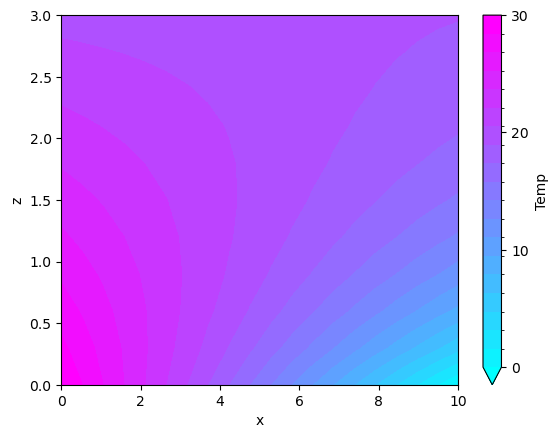

In [15]:
ds_high_res['value'].rename('Temp').plot.contourf(cmap='cool',vmin=0,vmax=30, levels=20, cbar_kwargs={'ticks': [0, 10, 20, 30]}
)

Solve for: $$\int_0^H U \frac{\partial T}{\partial x} dz$$

Assume U is constant

# Calculate ∂T/∂x

In [10]:
dT_dx = ds_high_res['value'].differentiate('x')

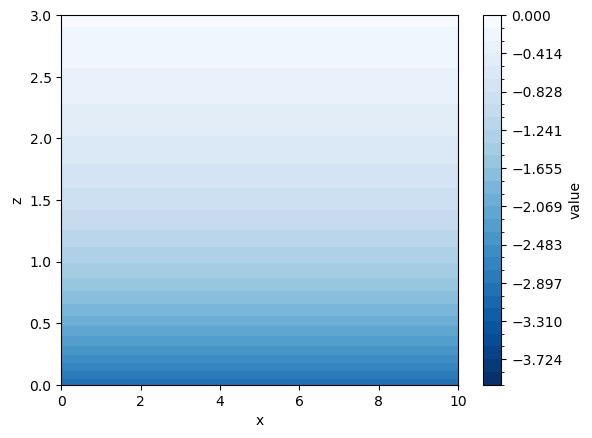

In [11]:
dT_dx.plot.contourf(levels=30, cmap='Blues_r', vmin=-4, vmax=0)

In [12]:
U = 3 #m/s

In [13]:
hor_adv = U*dT_dx

In [14]:
height_slice = slice(0, 3)
# Subset the data for z between 0 and 5
hor_adv_subset = hor_adv.sel(z=height_slice)
z_subset = ds['z'].sel(z=height_slice)
hor_adv_subset.integrate('z')

<xarray.DataArray 'value' (x: 20)> Size: 160B
array([-9.95051777, -9.95051777, -9.95051777, -9.95051777, -9.95051777,
       -9.95051777, -9.95051777, -9.95051777, -9.95051777, -9.95051777,
       -9.95051777, -9.95051777, -9.95051777, -9.95051777, -9.95051777,
       -9.95051777, -9.95051777, -9.95051777, -9.95051777, -9.95051777])
Coordinates:
  * x        (x) float64 160B 0.0 0.5263 1.053 1.579 ... 8.421 8.947 9.474 10.0